<a href="https://colab.research.google.com/github/ZenoZoldyck/ConvNets/blob/main/ConvNets_with_CIFAR_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.__version__

'2.5.0'

In [4]:
# loading the cifr dataset

(train_data, train_label), (test_data, test_label) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [9]:
#getting to understanf the data set
len(train_data), len(test_data), train_data[0].shape, train_label[0].shape

(50000, 10000, (32, 32, 3), (1,))

In [7]:
train_data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
tf.squeeze(train_label[0]).shape

TensorShape([])

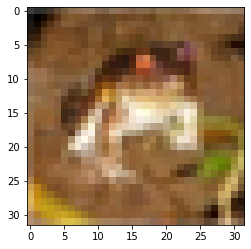

In [20]:
class_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.imshow(train_data[0], cmap = plt.cm.binary)
plt.xlabel = class_name[train_label[0][0]]

In [26]:
# normalizing the data
train_data_norm, test_data_norm = train_data / 255.0, test_data / 255.0
len(class_name)

10

In [30]:
# model creation
tf.random.set_seed(42)

model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)),
   tf.keras.layers.MaxPooling2D((2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
   tf.keras.layers.MaxPooling2D((2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation = "sigmoid"),
   tf.keras.layers.Dense(10, activation = "softmax")                         
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

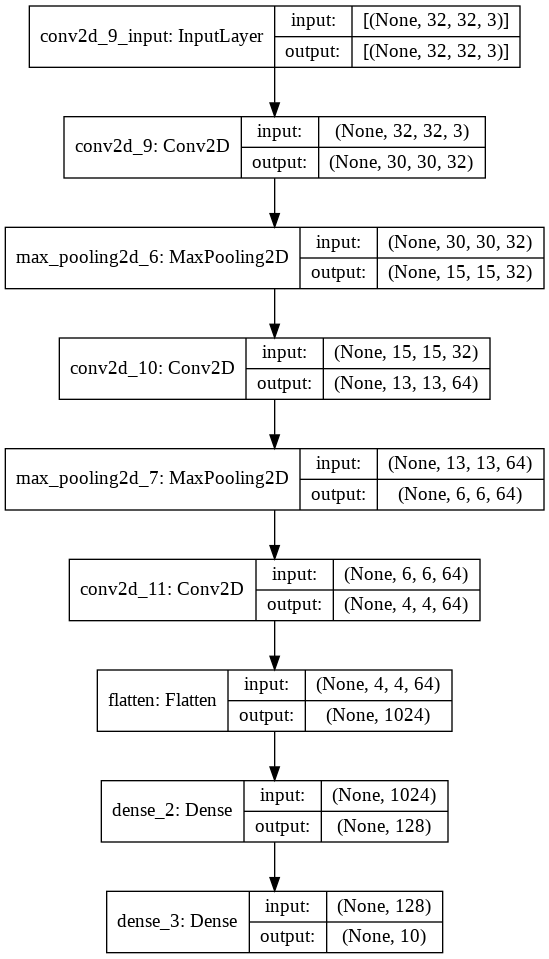

In [31]:
# time to visualize

from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

In [35]:
# time to compile and fit

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history = model.fit(train_data_norm, train_label, epochs = 25,
                    validation_data = (test_data_norm, test_label))


Epoch 1/25
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5879 - accuracy: 0.4190 - val_loss: 1.3037 - val_accuracy: 0.5314
Epoch 2/25
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2168 - accuracy: 0.5642 - val_loss: 1.1459 - val_accuracy: 0.5919
Epoch 3/25
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0531 - accuracy: 0.6277 - val_loss: 1.0050 - val_accuracy: 0.6505
Epoch 4/25
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9526 - accuracy: 0.6651 - val_loss: 0.9561 - val_accuracy: 0.6647
Epoch 5/25
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8704 - accuracy: 0.6932 - val_loss: 0.9067 - val_accuracy: 0.6836
Epoch 6/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8052 - accuracy: 0.7177 - val_loss: 0.9378 - val_accuracy: 0.6722
Epoch 7/25
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7521 - accuracy: 0.7357 - val_loss: 0.9001 -

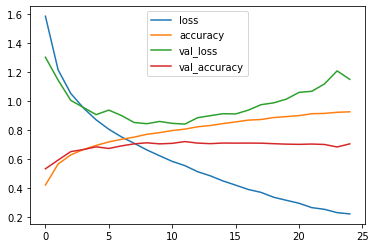

In [36]:
# time to visualize our traning but it looks like we have offerfitted our model.
pd.DataFrame(history.history).plot()

In [ ]:
# To improve the model we can change the learning rate.
# Decrease the number of neurons in the dense layer.
# Instead of max pooling use average pooling.
# Use more filters to catch more intricate features.

In [40]:
y_preds = model.predict(test_data)
y_preds[:10]

array([[5.25518477e-01, 5.02669858e-03, 3.37389029e-05, 3.39638069e-02,
        8.25171664e-05, 3.36891264e-01, 2.61113400e-05, 2.74057122e-04,
        8.75529498e-02, 1.06304465e-02],
       [1.96126565e-01, 2.54474841e-02, 1.41019934e-08, 3.61291882e-07,
        3.63620984e-07, 4.86340412e-10, 2.89637225e-09, 1.60153070e-06,
        7.78333306e-01, 9.02955508e-05],
       [8.92305970e-02, 3.32672328e-01, 2.61116220e-05, 4.60992233e-05,
        6.75118372e-07, 1.24124267e-06, 2.98342893e-05, 1.76742415e-05,
        4.37329113e-01, 1.40646413e-01],
       [8.19022596e-01, 5.30714681e-03, 5.03478350e-06, 5.95269958e-05,
        3.14915524e-04, 3.01384006e-07, 4.83586016e-09, 2.66385229e-07,
        1.75127611e-01, 1.62686003e-04],
       [1.83895634e-06, 1.11017581e-02, 1.39037415e-03, 3.00446283e-02,
        4.01494443e-01, 2.14054659e-01, 1.47452638e-01, 4.12945246e-06,
        1.94455236e-01, 2.56334943e-07],
       [2.63502330e-01, 5.58151305e-01, 5.67642019e-05, 2.47235522e-02,
   

In [42]:
# Lets see the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(test_label, tf.argmax(y_preds, axis = 1))

array([[780,  45,  25,   4,   0,   7,   1,  15,  99,  24],
       [ 65, 822,   0,   1,   0,   3,   0,   2,  46,  61],
       [250,  83, 242,  77,  10,  99,  16,  71,  75,  77],
       [151,  90,  37, 210,   4, 173,  20,  92, 107, 116],
       [216, 173,  38,  77,  94,  45,  18, 160,  67, 112],
       [106,  61,  23,  92,   4, 462,  11,  93,  52,  96],
       [116, 194,  29,  55,  10,  41, 340,  25,  79, 111],
       [119,  63,  11,  15,   7,  54,   2, 608,  24,  97],
       [158,  45,   4,   4,   1,   2,   0,   7, 743,  36],
       [115, 177,   1,   1,   0,   1,   0,  16,  54, 635]])

In [ ]:
# looks like our model is very confused !!!

In [43]:
# One final attempt to create a better model.

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
   tf.keras.layers.Conv2D(16, (3, 3), activation = "relu", input_shape = (32, 32, 3)),
   tf.keras.layers.MaxPooling2D((2, 2)),
   tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
   tf.keras.layers.MaxPooling2D((2, 2)),
   tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation = "relu"),
   tf.keras.layers.Dense(10, activation = "softmax")                         
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.005),
              metrics = ["accuracy"])

history_1 = model_1.fit(train_data_norm, train_label, epochs = 15,
                    validation_data = (test_data_norm, test_label))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6740 - accuracy: 0.3855 - val_loss: 1.5585 - val_accuracy: 0.4386
Epoch 2/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4186 - accuracy: 0.4888 - val_loss: 1.3941 - val_accuracy: 0.4919
Epoch 3/15
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3337 - accuracy: 0.5228 - val_loss: 1.4322 - val_accuracy: 0.4892
Epoch 4/15
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2907 - accuracy: 0.5382 - val_loss: 1.3734 - val_accuracy: 0.5102
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2550 - accuracy: 0.5540 - val_loss: 1.3306 - val_accuracy: 0.5283
Epoch 6/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2384 - accuracy: 0.5606 - val_loss: 1.3053 - val_accuracy: 0.5418
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2113 - accuracy: 0.5676 - val_loss: 1.2616 -

In [ ]:
# It seems we did even worse this time...

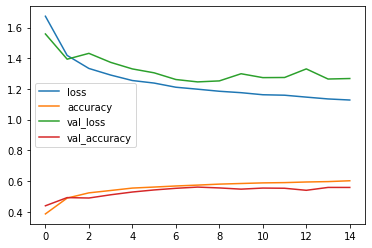

In [44]:
pd.DataFrame(history_1.history).plot()